In [ ]:
import logging
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# disable scikit-learn warnings
logger = logging.getLogger('sklearn')
logger.setLevel(logging.ERROR)

import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import seaborn as sns

detail_url = 'http://minio-api.kubby.ninja/fix-dive-storage/projects/1234567890/playlists/low_details.json'

video_details = requests.get(detail_url).json()

objects_url = 'http://minio-api.kubby.ninja/fix-dive-storage/projects/1234567890/features/objects/objects.gzip.parquet'

df = pd.read_parquet(objects_url)

video_duration = float(video_details['format']['duration'])
total_frames = int(video_details['custom']['total_frames'])

# progress from 0 to 1 based on the frame number
df['progress'] = df['frame_index'] / total_frames

df['progress_sec'] = df['progress'] * video_duration

# find center from x, y, w, h
df['center_x'] = df['x'] + df['width'] / 2
df['center_y'] = df['y'] + df['height'] / 2

width_z = df['width'].agg(['mean', 'std'])
height_z = df['height'].agg(['mean', 'std'])

zscore = 1
wzm = width_z['mean'] - zscore * width_z['std']
wzp = width_z['mean'] + zscore * width_z['std']
hzm = height_z['mean'] - zscore * height_z['std']
hzp = height_z['mean'] + zscore * height_z['std']

df = df[(df['width'] > wzm) & (df['width'] < wzp)]
df = df[(df['height'] > hzm) & (df['height'] < hzp)]

df

In [ ]:
sns.histplot(df['width'], bins=100)
plt.show()

sns.histplot(df['height'], bins=100)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter
from matplotlib import cm

def convert_to_heatmap(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

def kmeans_inertia(scaled_data, k, alpha_k=0.02):
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia


def best_kmeans(scaled_data, k_range):
    ans = []
    for k in k_range:
        scaled_inertia = kmeans_inertia(scaled_data, k)
        ans.append((k, scaled_inertia))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

<Figure size 533.333x300 with 0 Axes>

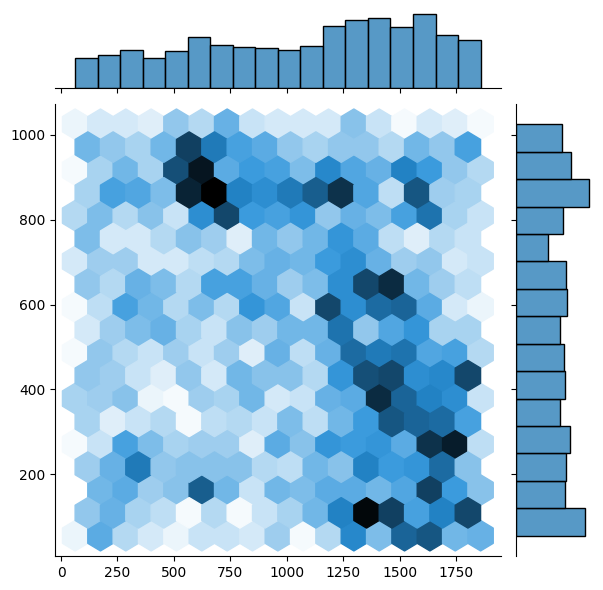

<Figure size 533.333x300 with 0 Axes>

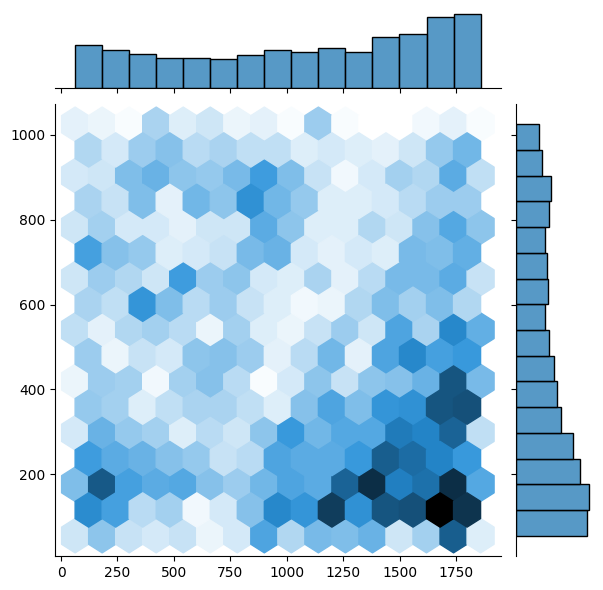

<Figure size 533.333x300 with 0 Axes>

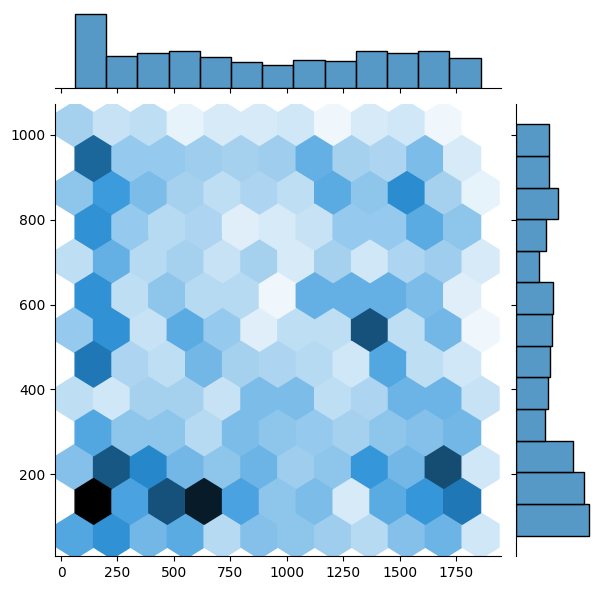

<Figure size 533.333x300 with 0 Axes>

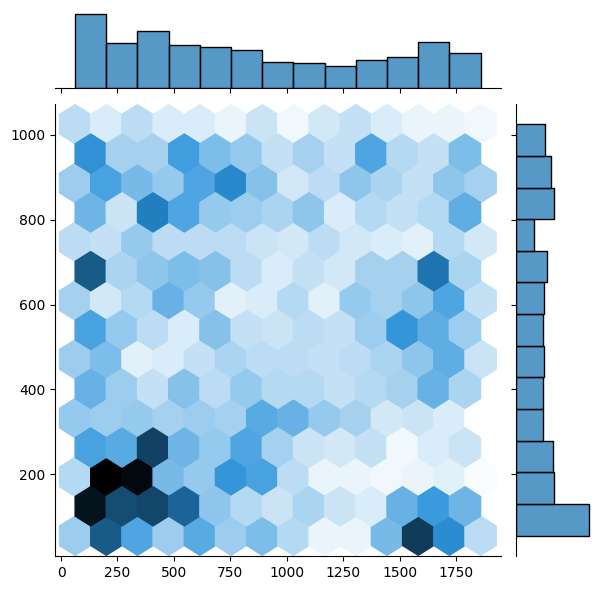

<Figure size 533.333x300 with 0 Axes>

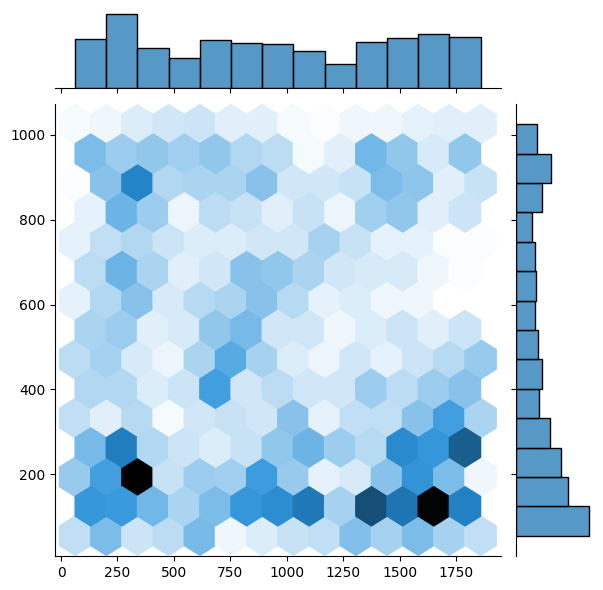

<Figure size 533.333x300 with 0 Axes>

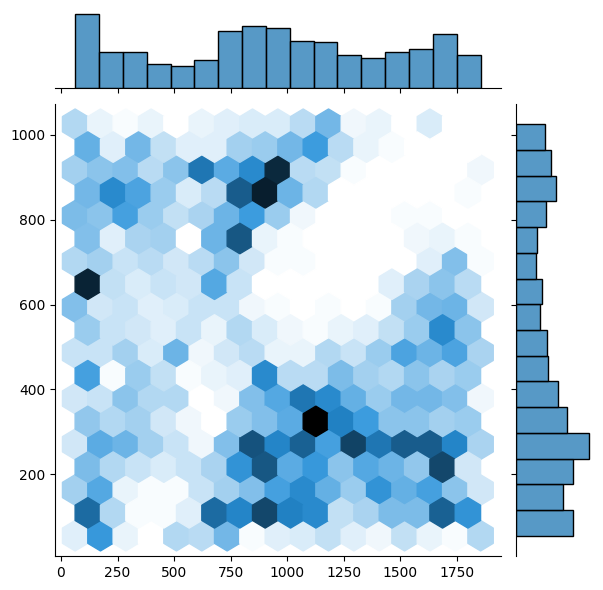

<Figure size 533.333x300 with 0 Axes>

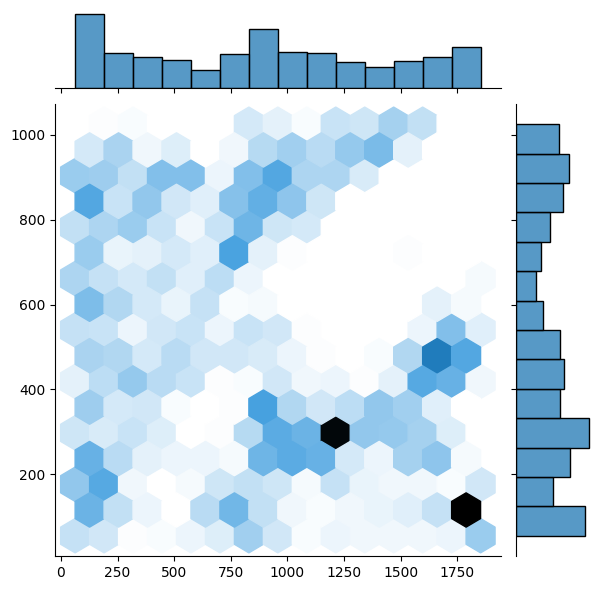

<Figure size 533.333x300 with 0 Axes>

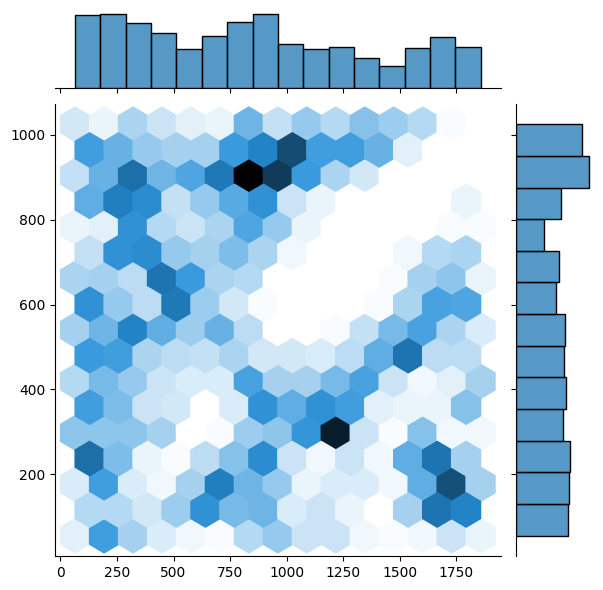

<Figure size 533.333x300 with 0 Axes>

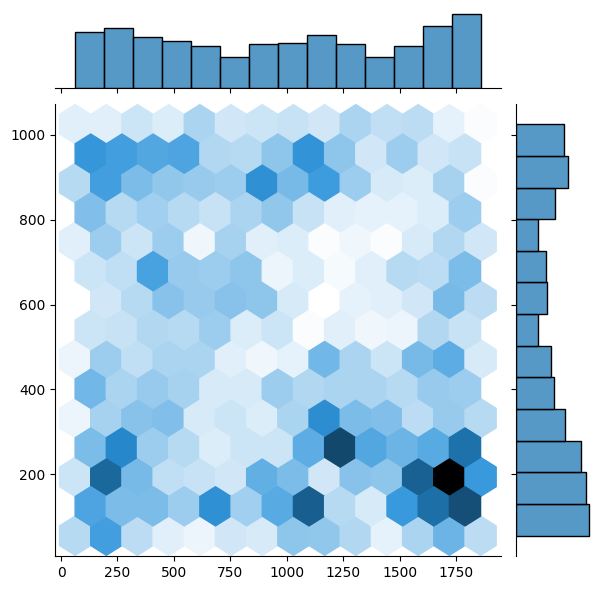

<Figure size 533.333x300 with 0 Axes>

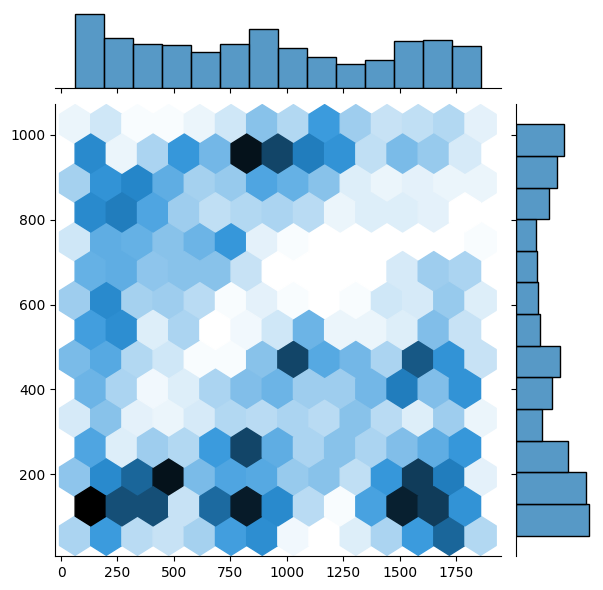

<Figure size 533.333x300 with 0 Axes>

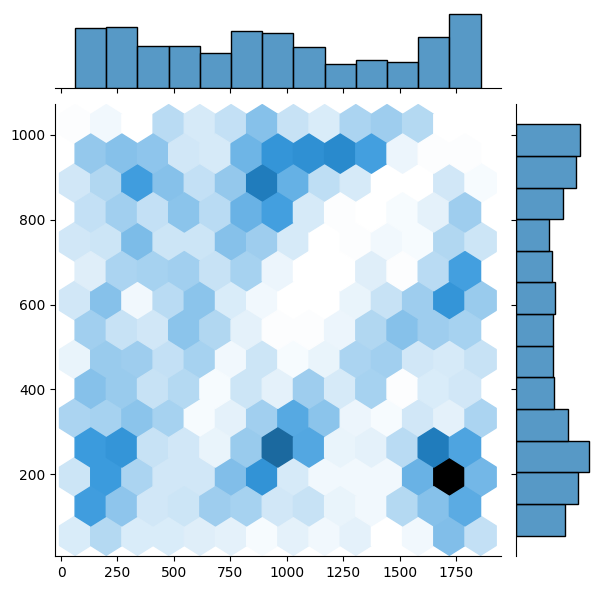

<Figure size 533.333x300 with 0 Axes>

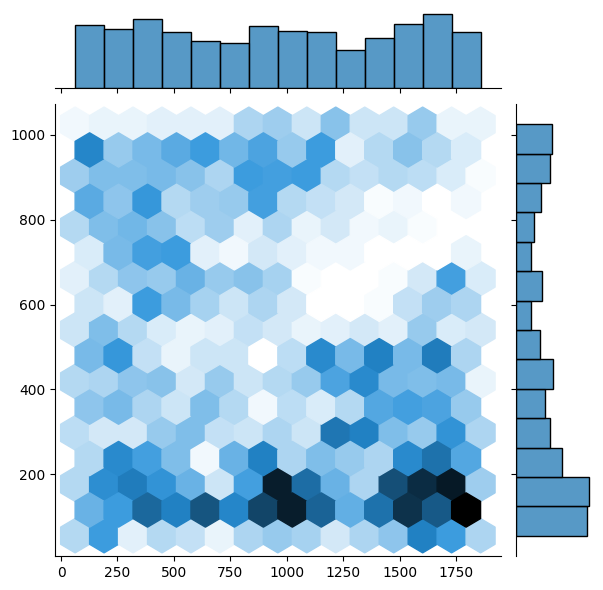

<Figure size 533.333x300 with 0 Axes>

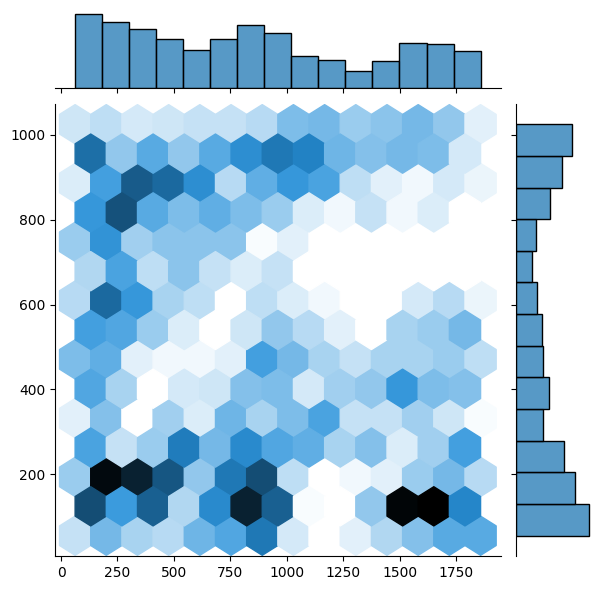

<Figure size 533.333x300 with 0 Axes>

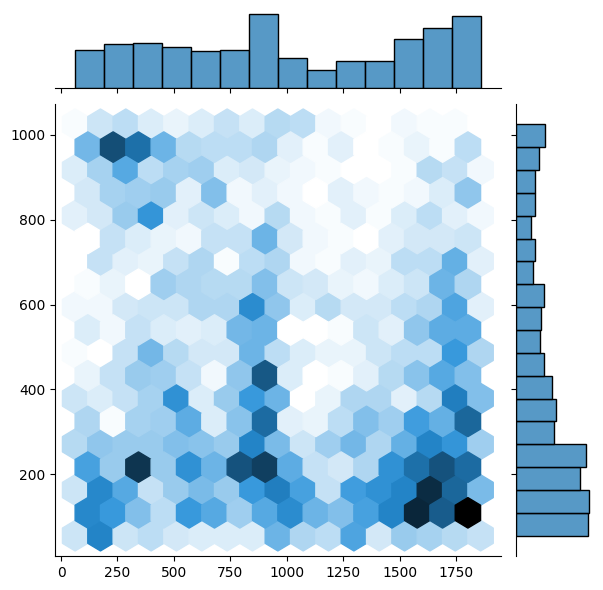

<Figure size 533.333x300 with 0 Axes>

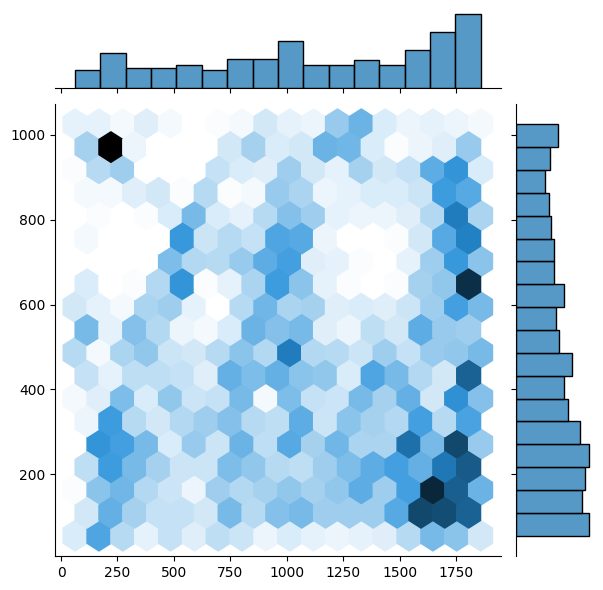

<Figure size 533.333x300 with 0 Axes>

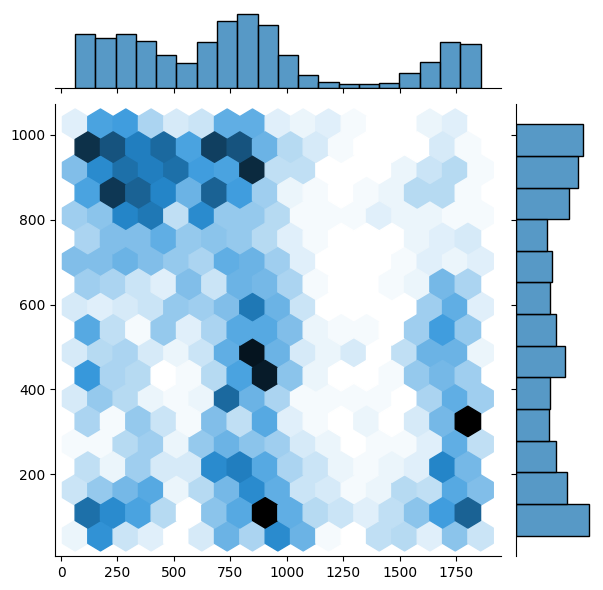

<Figure size 533.333x300 with 0 Axes>

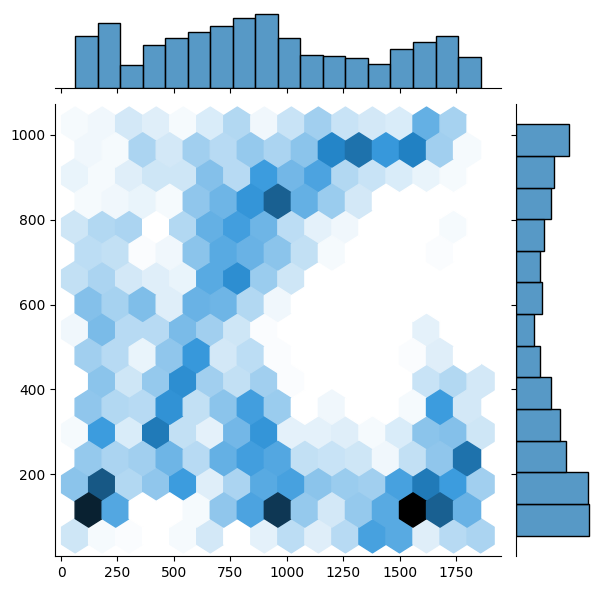

<Figure size 533.333x300 with 0 Axes>

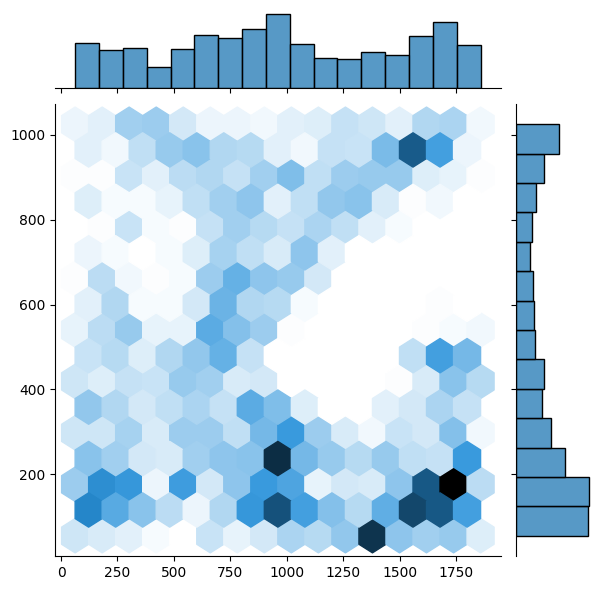

<Figure size 533.333x300 with 0 Axes>

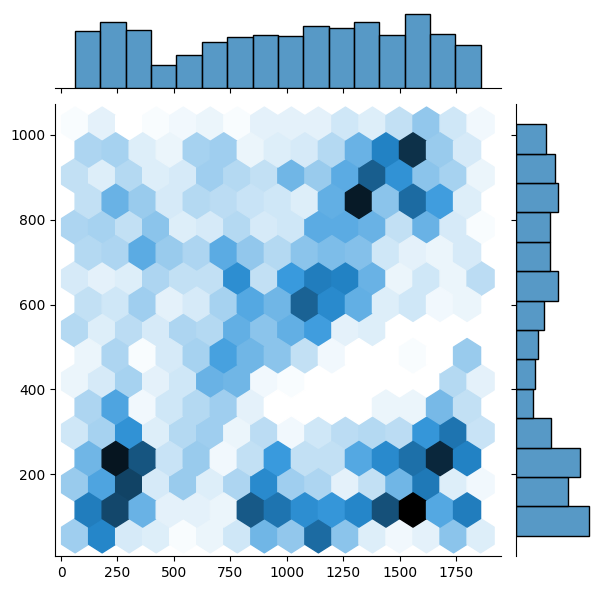

<Figure size 533.333x300 with 0 Axes>

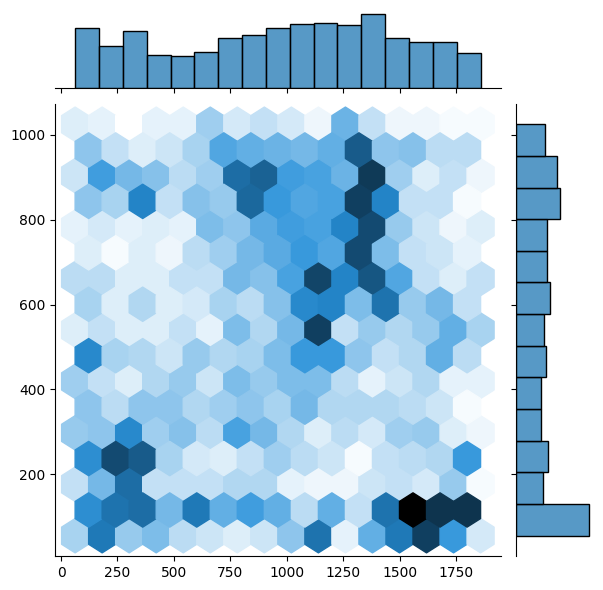

<Figure size 533.333x300 with 0 Axes>

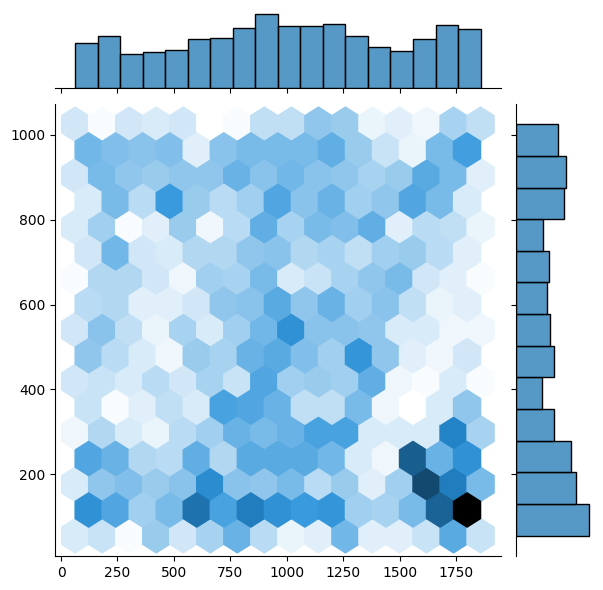

<Figure size 533.333x300 with 0 Axes>

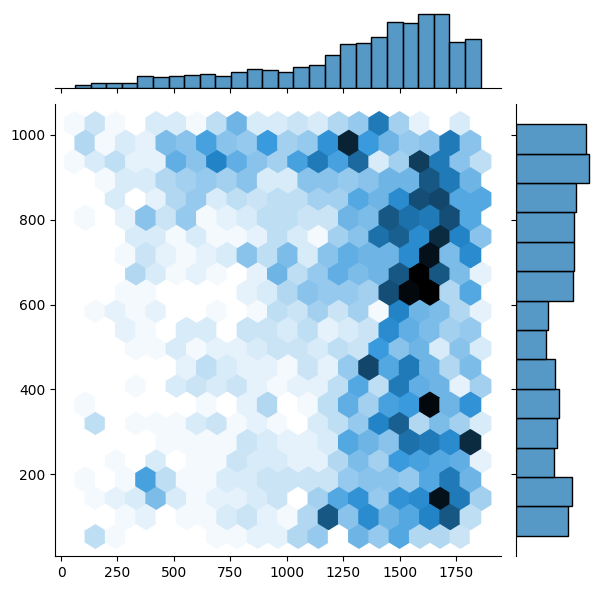

<Figure size 533.333x300 with 0 Axes>

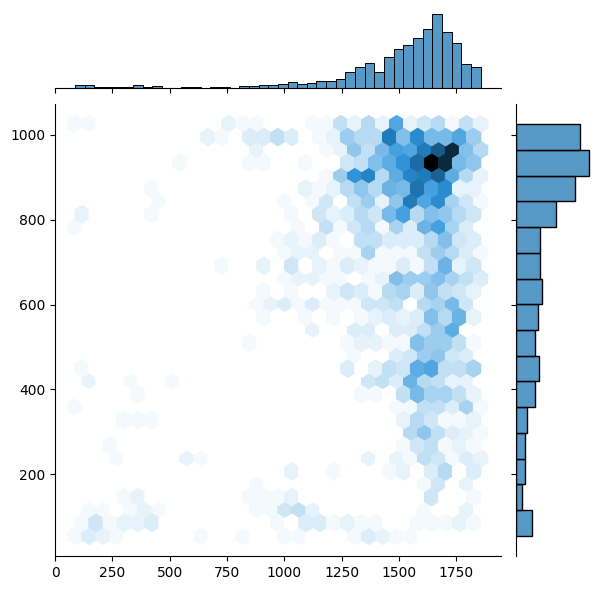

<Figure size 533.333x300 with 0 Axes>

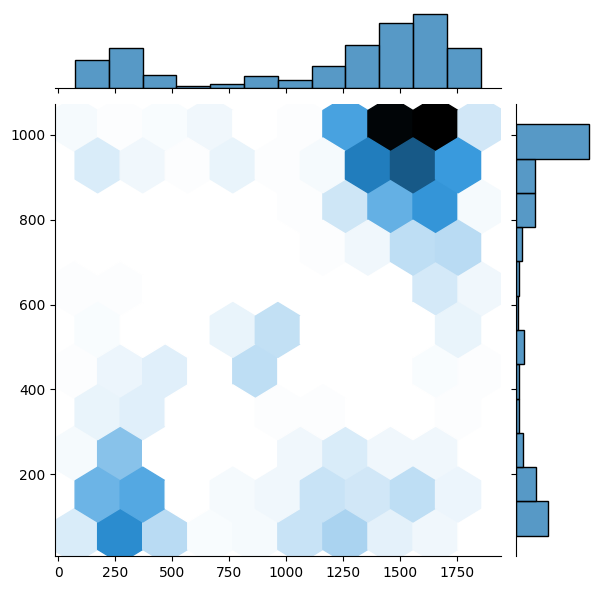

<Figure size 533.333x300 with 0 Axes>

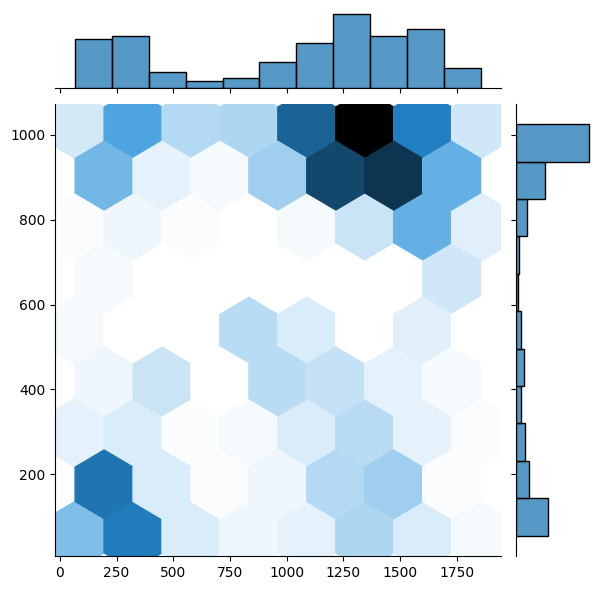

<Figure size 533.333x300 with 0 Axes>

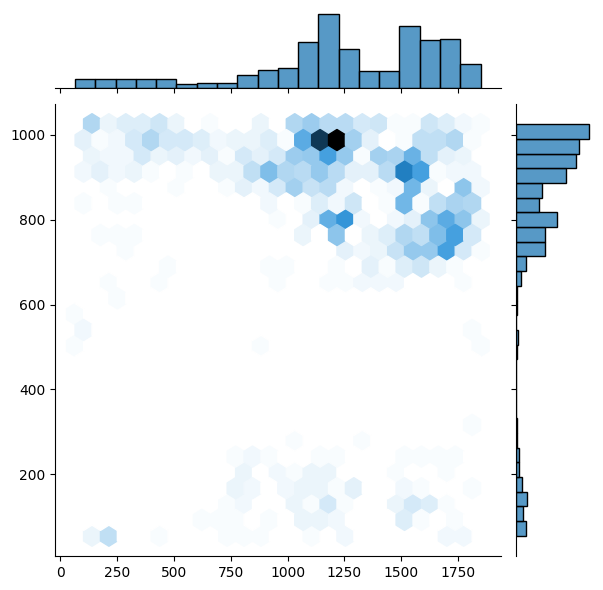

<Figure size 533.333x300 with 0 Axes>

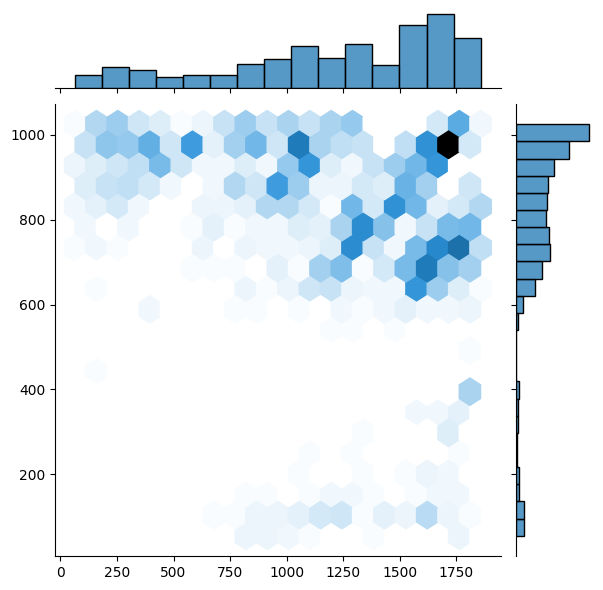

<Figure size 533.333x300 with 0 Axes>

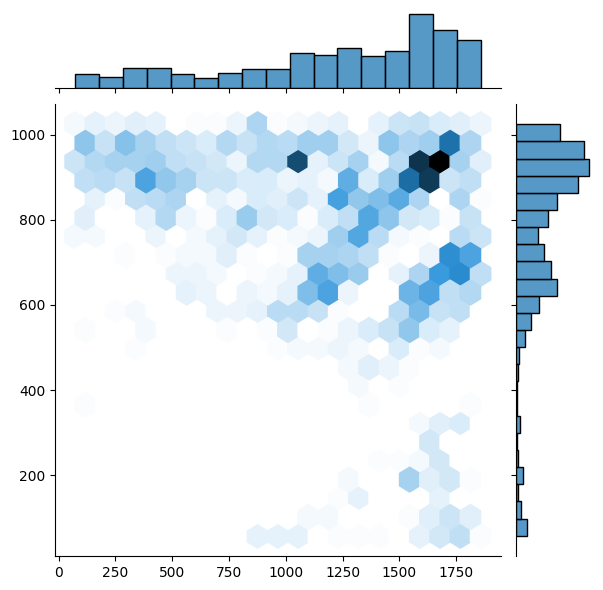

<Figure size 533.333x300 with 0 Axes>

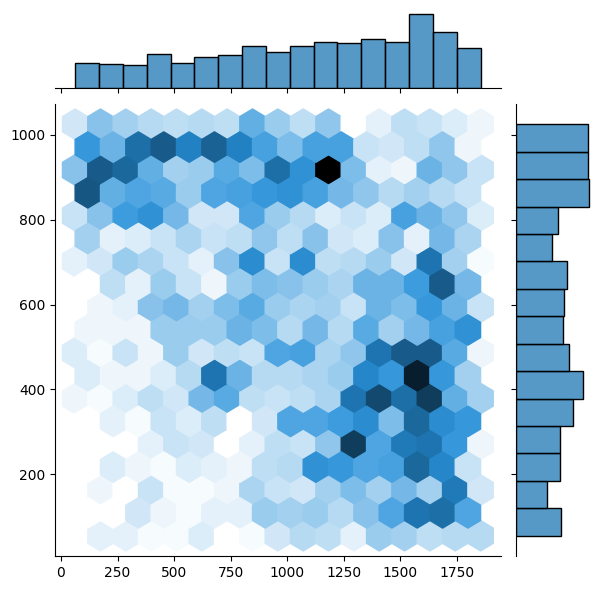

<Figure size 533.333x300 with 0 Axes>

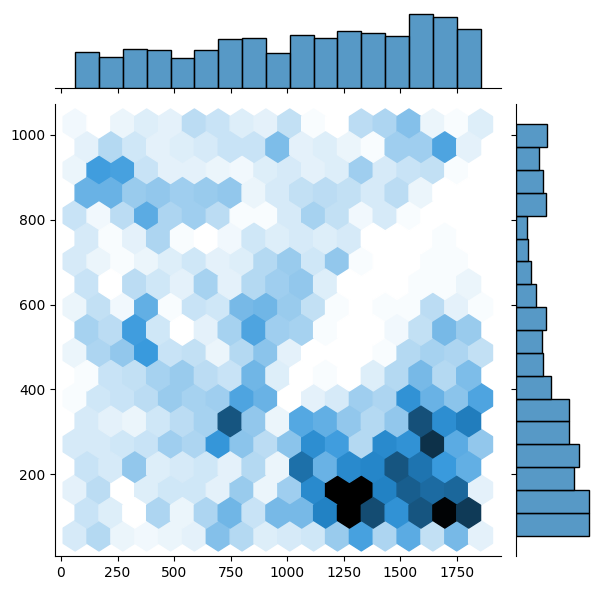

<Figure size 533.333x300 with 0 Axes>

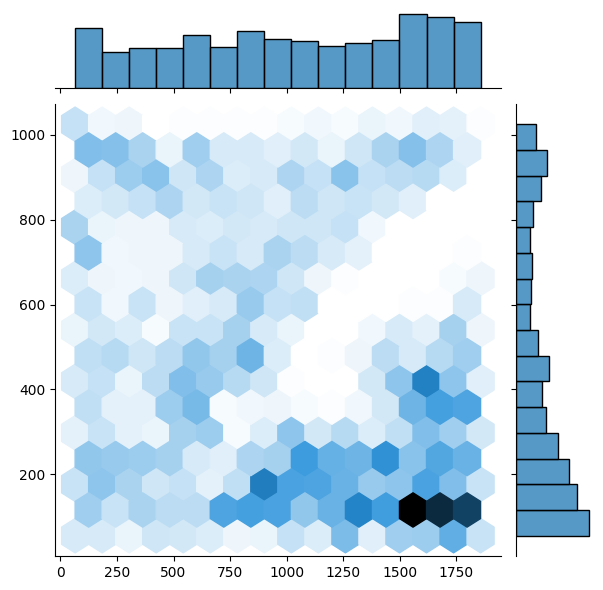

<Figure size 533.333x300 with 0 Axes>

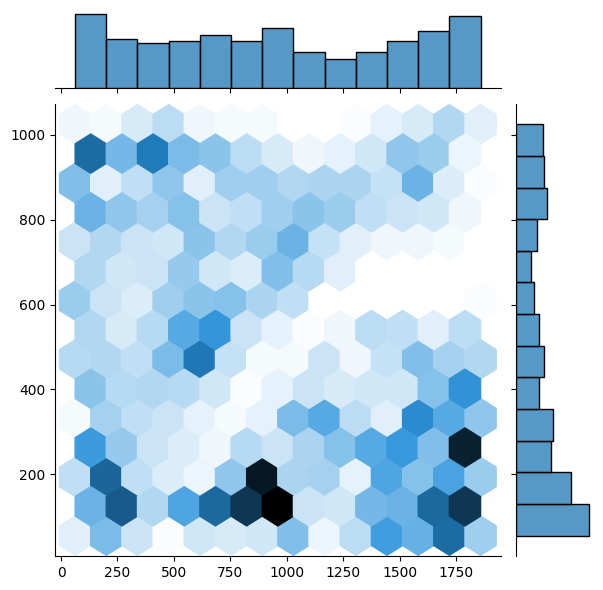

<Figure size 533.333x300 with 0 Axes>

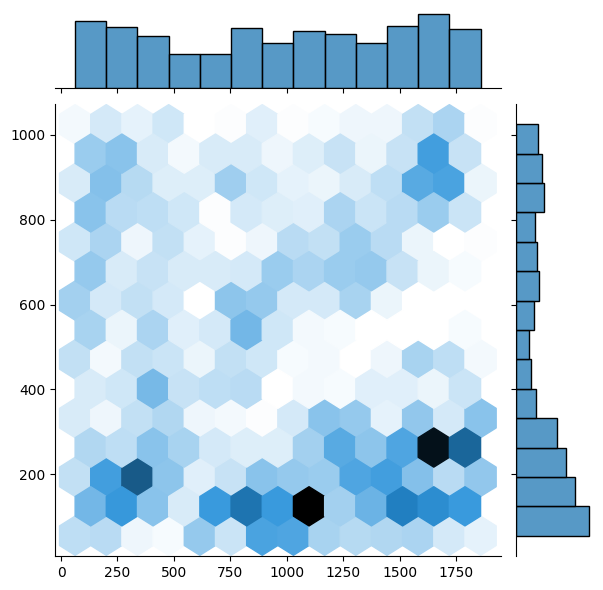

<Figure size 533.333x300 with 0 Axes>

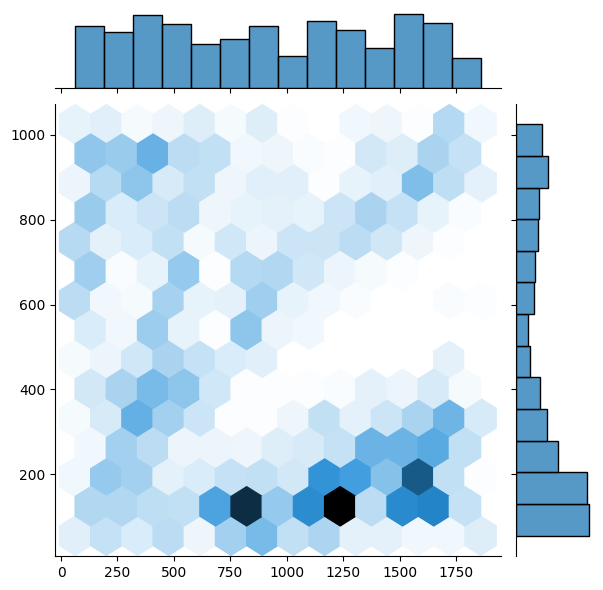

<Figure size 533.333x300 with 0 Axes>

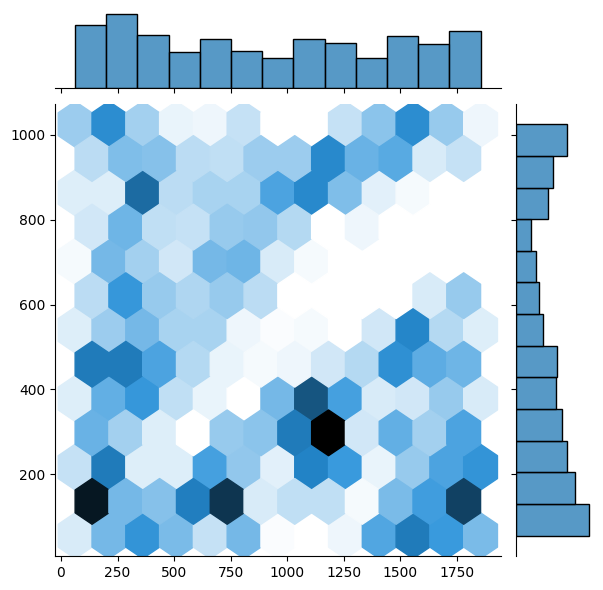

<Figure size 533.333x300 with 0 Axes>

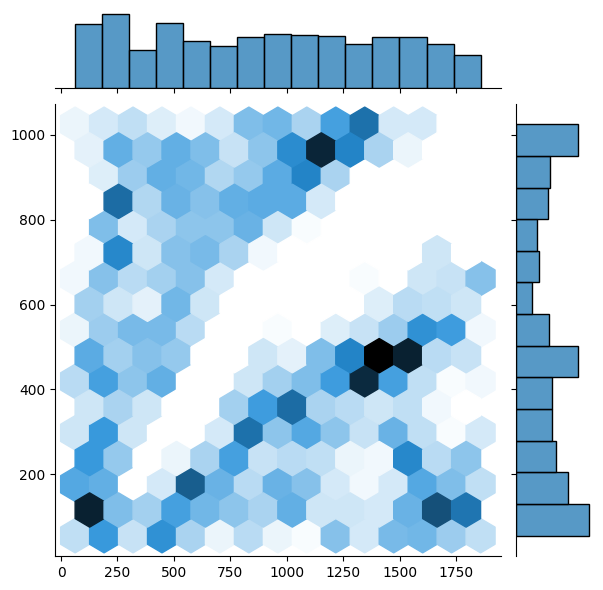

<Figure size 533.333x300 with 0 Axes>

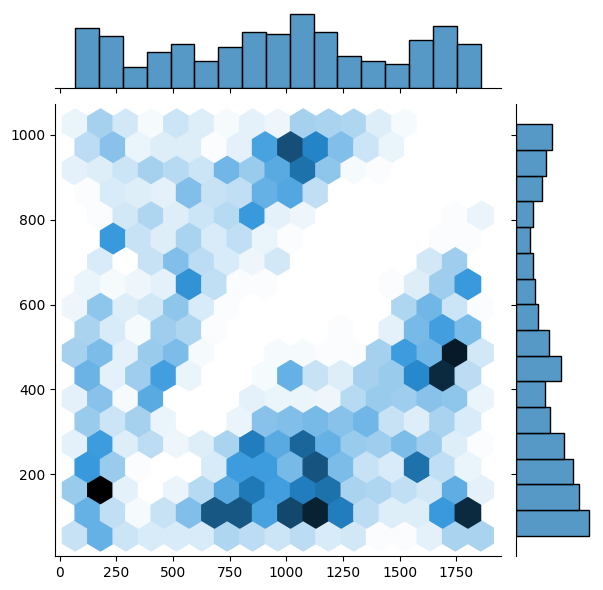

<Figure size 533.333x300 with 0 Axes>

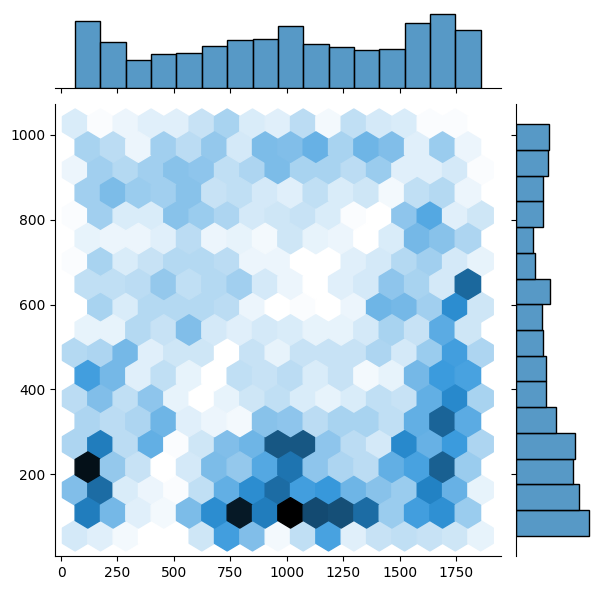

<Figure size 533.333x300 with 0 Axes>

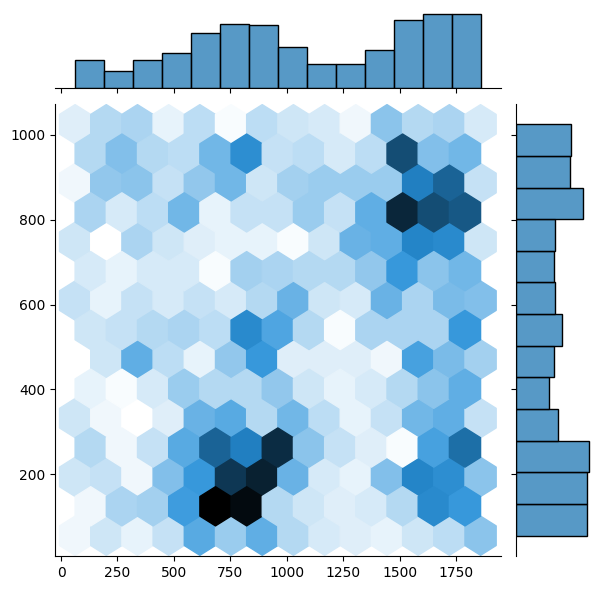

<Figure size 533.333x300 with 0 Axes>

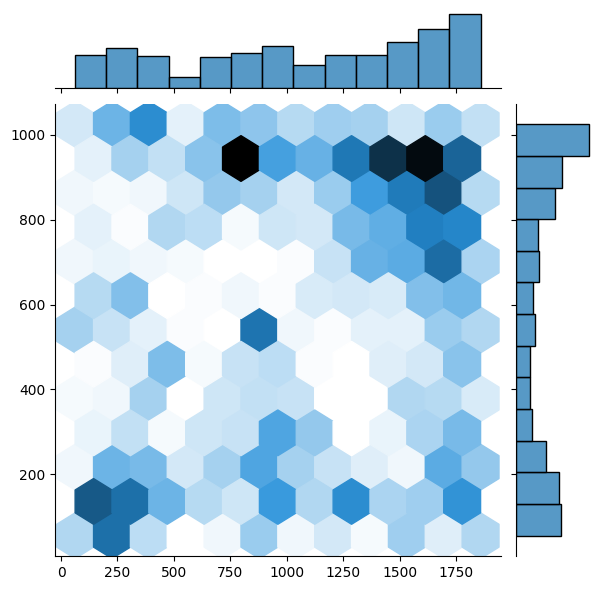

<Figure size 533.333x300 with 0 Axes>

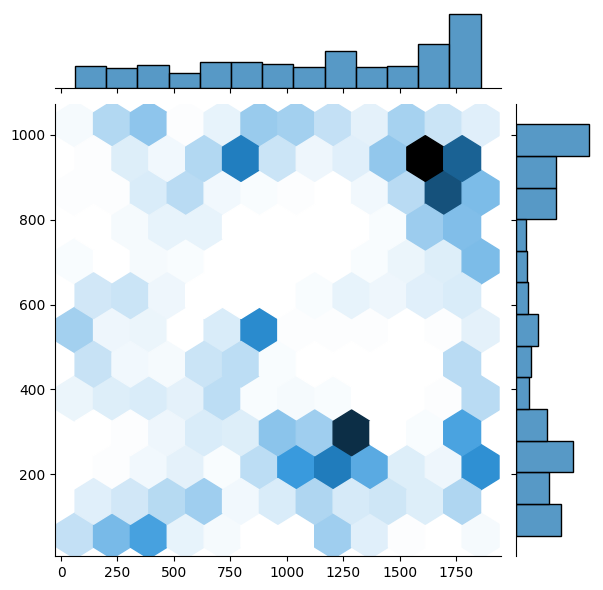

<Figure size 533.333x300 with 0 Axes>

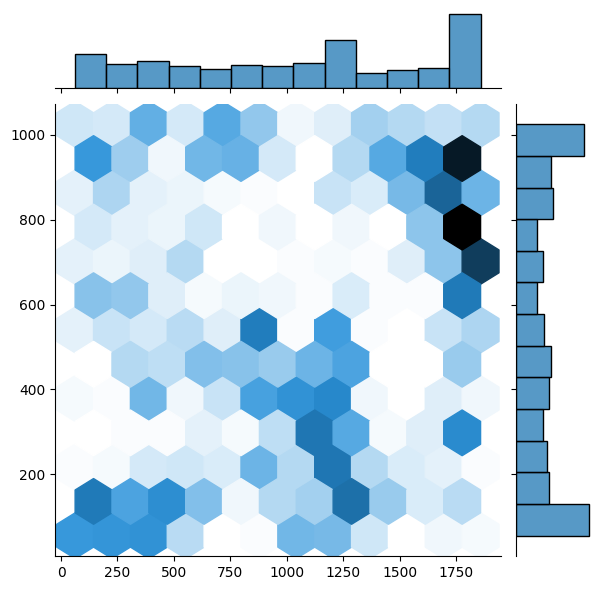

<Figure size 533.333x300 with 0 Axes>

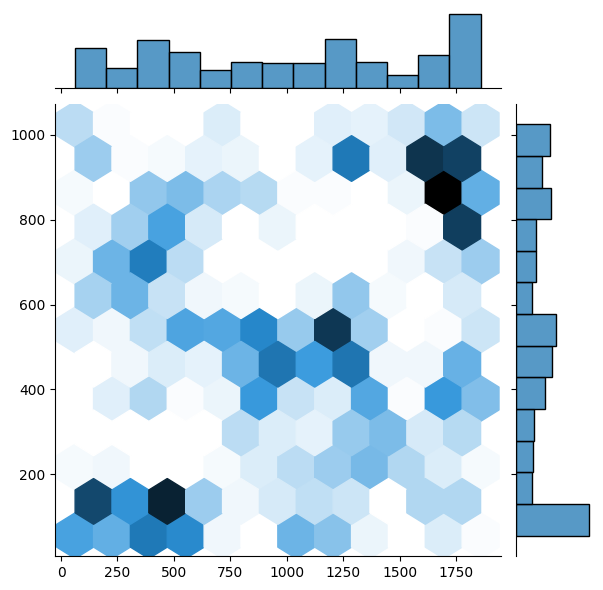

<Figure size 533.333x300 with 0 Axes>

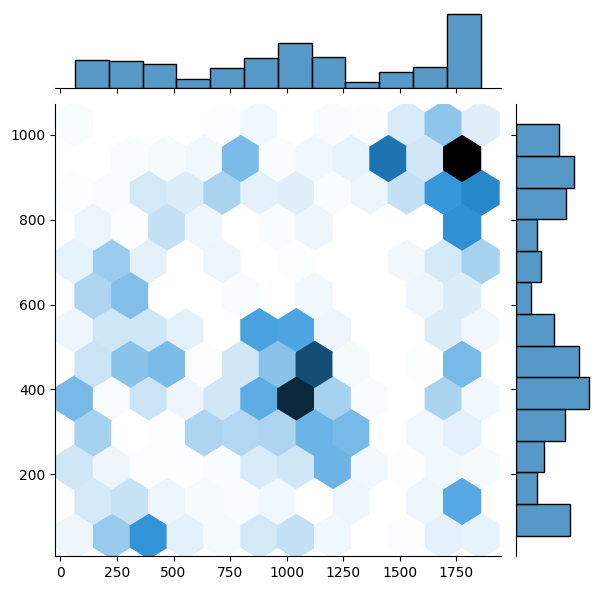

<Figure size 533.333x300 with 0 Axes>

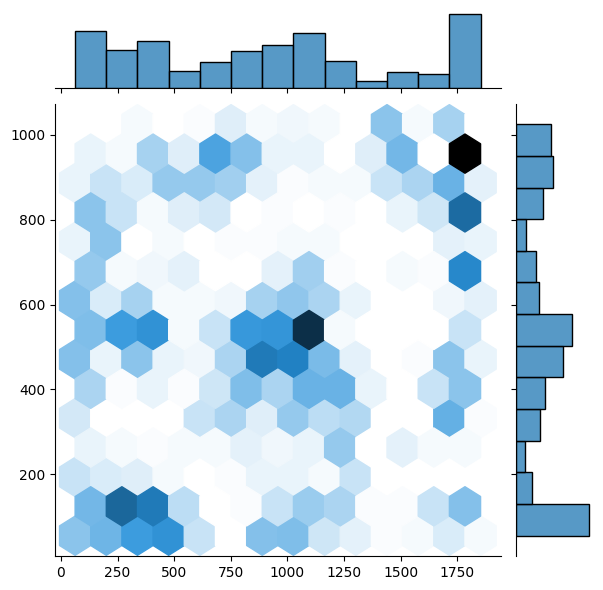

<Figure size 533.333x300 with 0 Axes>

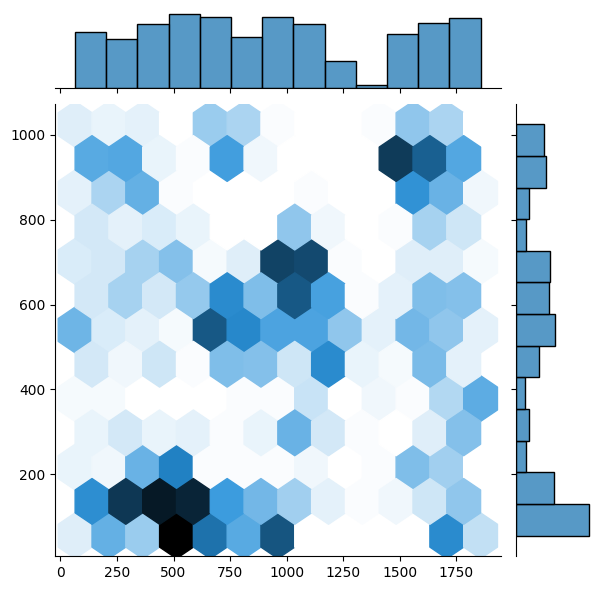

<Figure size 533.333x300 with 0 Axes>

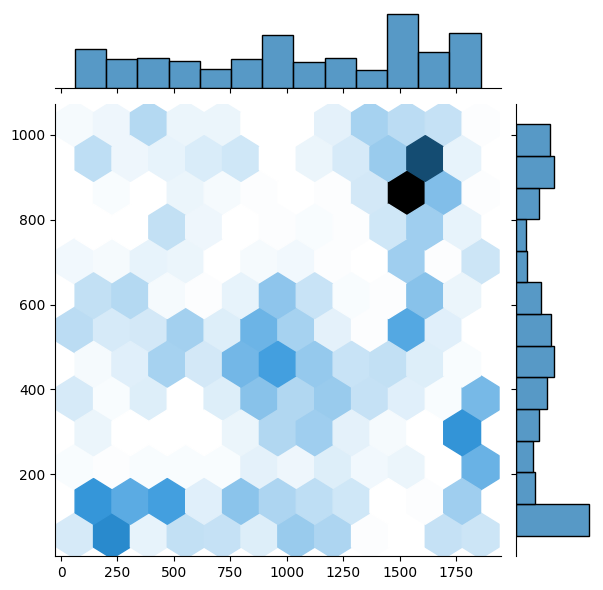

<Figure size 533.333x300 with 0 Axes>

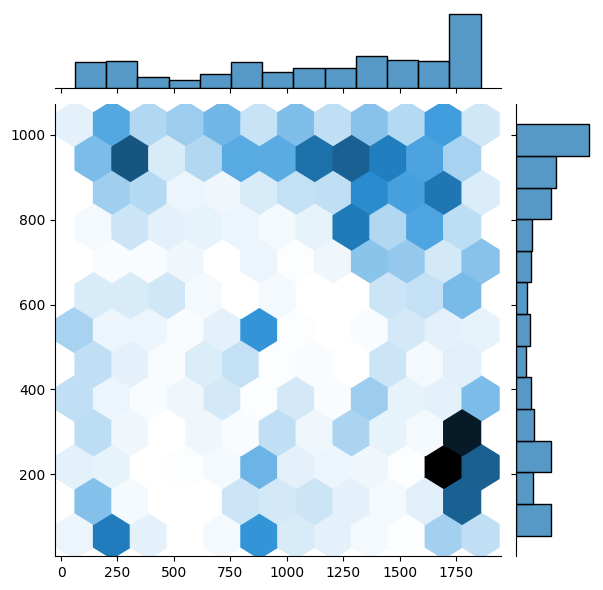

<Figure size 533.333x300 with 0 Axes>

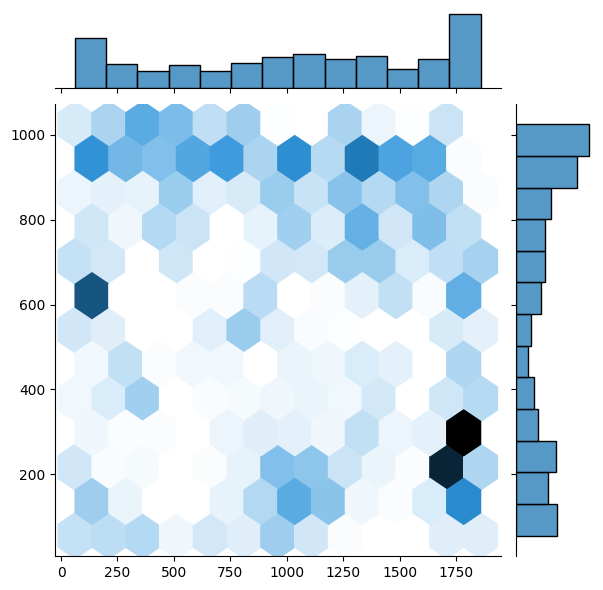

<Figure size 533.333x300 with 0 Axes>

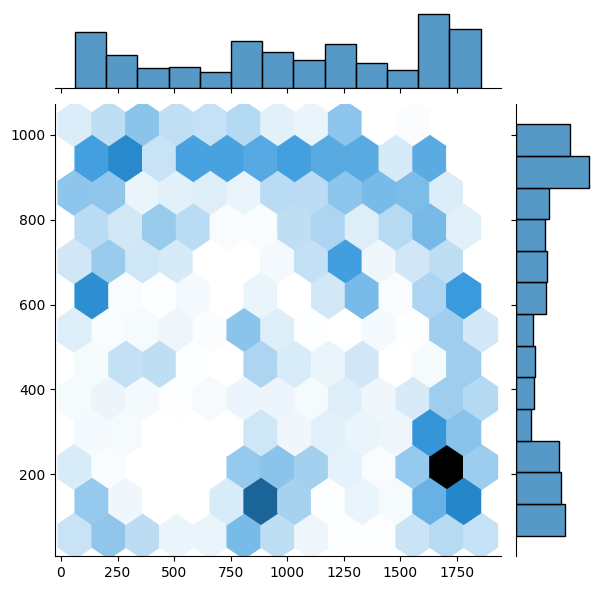

<Figure size 533.333x300 with 0 Axes>

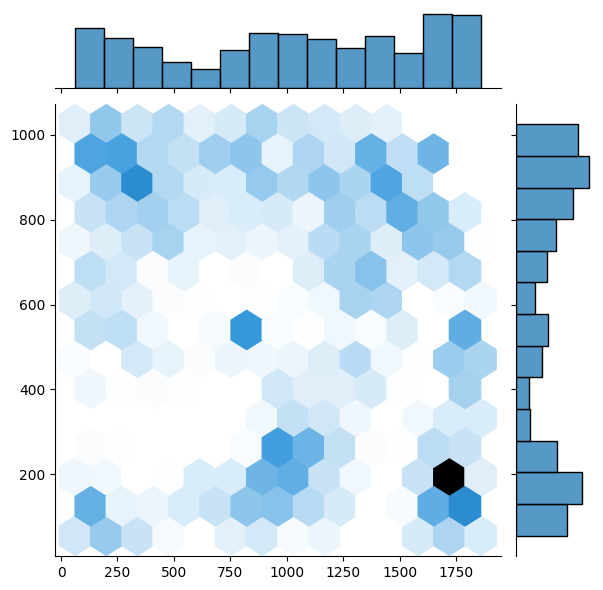

<Figure size 533.333x300 with 0 Axes>

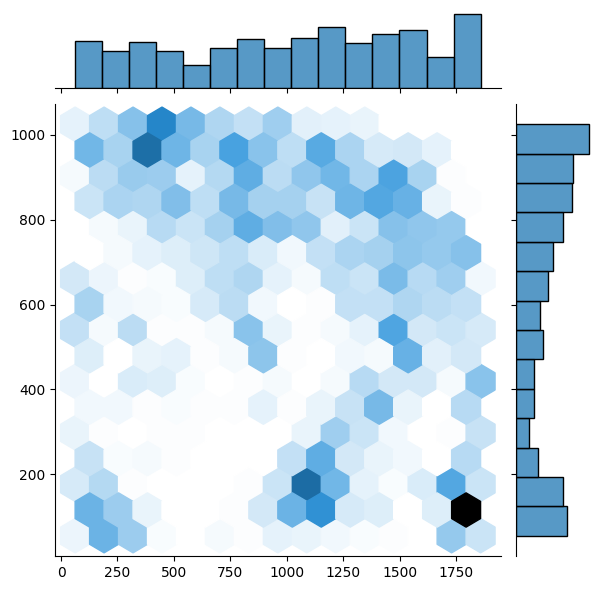

<Figure size 533.333x300 with 0 Axes>

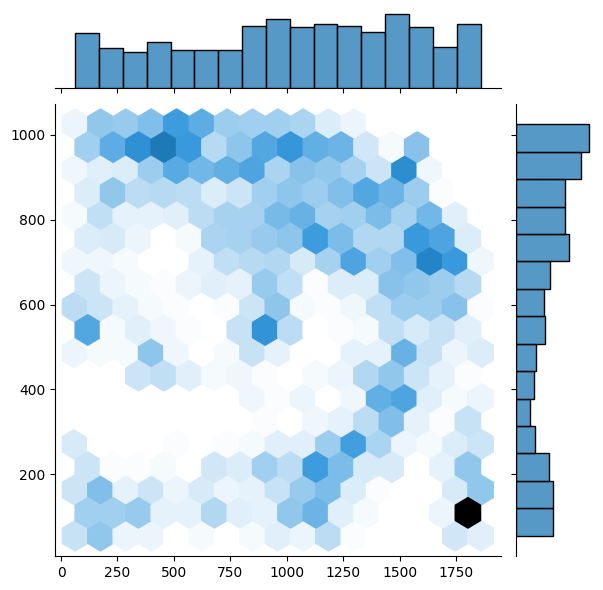

<Figure size 533.333x300 with 0 Axes>

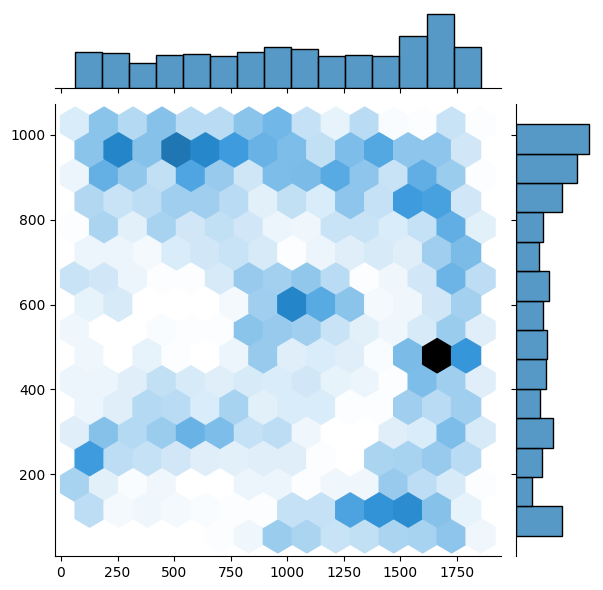

<Figure size 533.333x300 with 0 Axes>

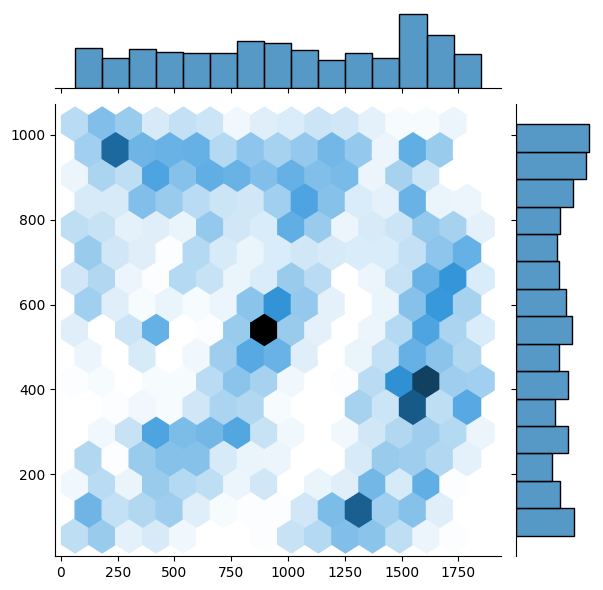

<Figure size 533.333x300 with 0 Axes>

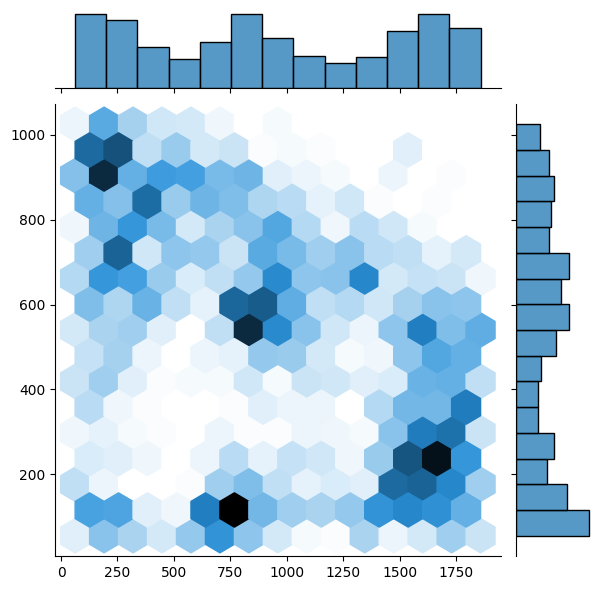

<Figure size 533.333x300 with 0 Axes>

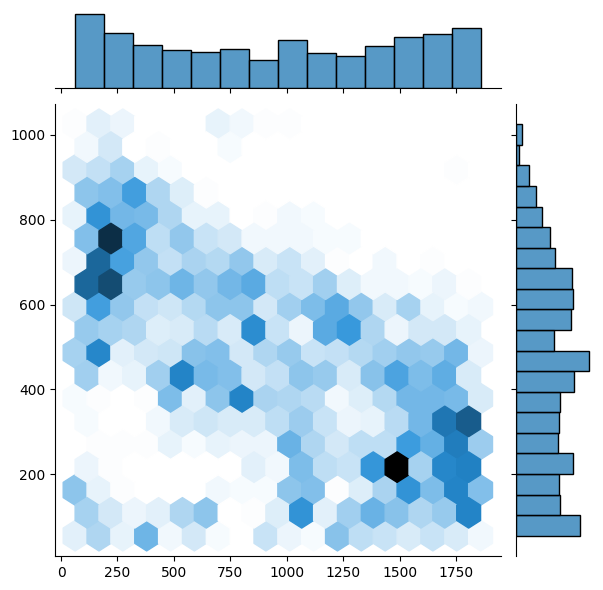

<Figure size 533.333x300 with 0 Axes>

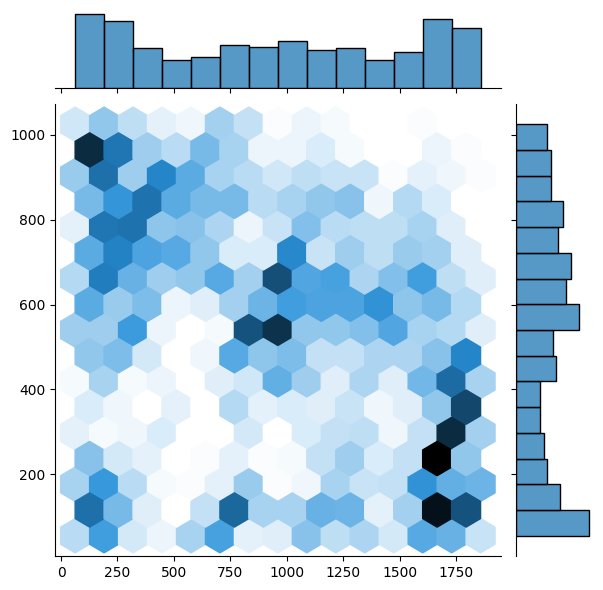

<Figure size 533.333x300 with 0 Axes>

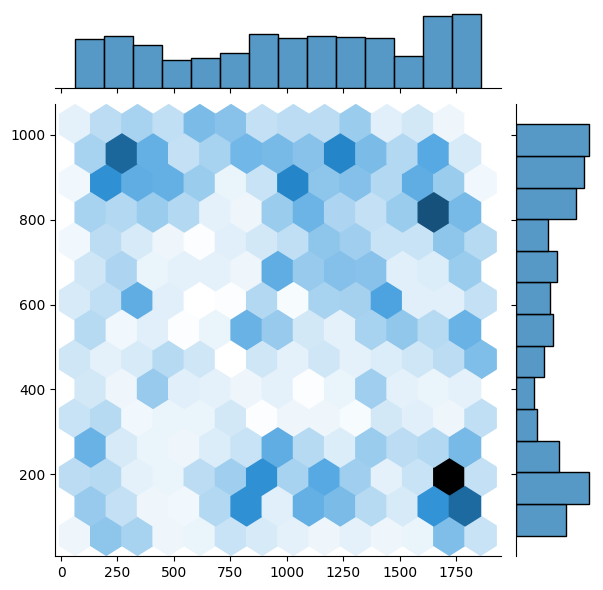

<Figure size 533.333x300 with 0 Axes>

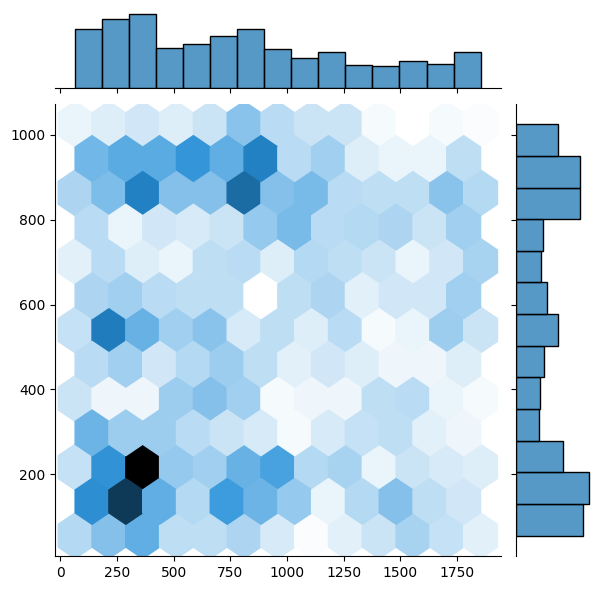

<Figure size 533.333x300 with 0 Axes>

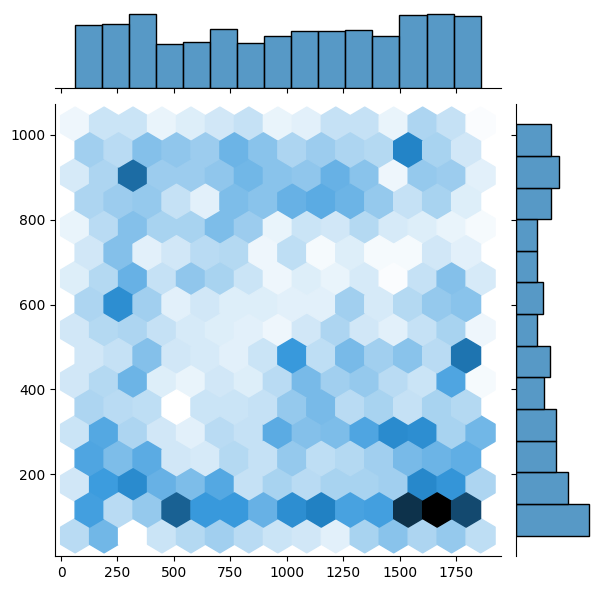

<Figure size 533.333x300 with 0 Axes>

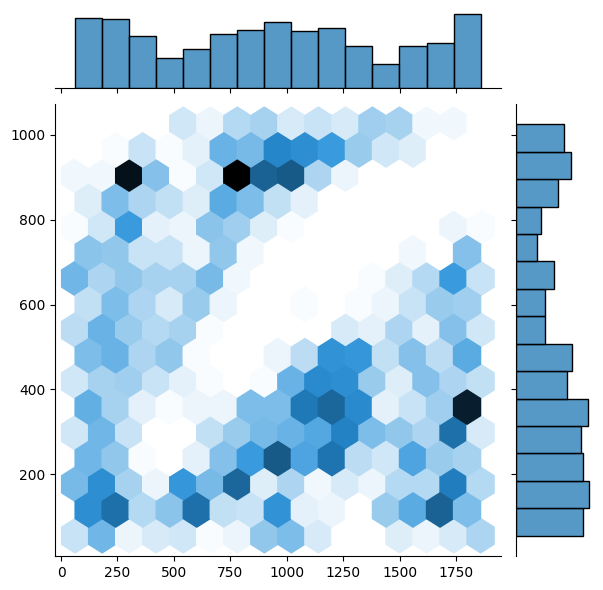

<Figure size 533.333x300 with 0 Axes>

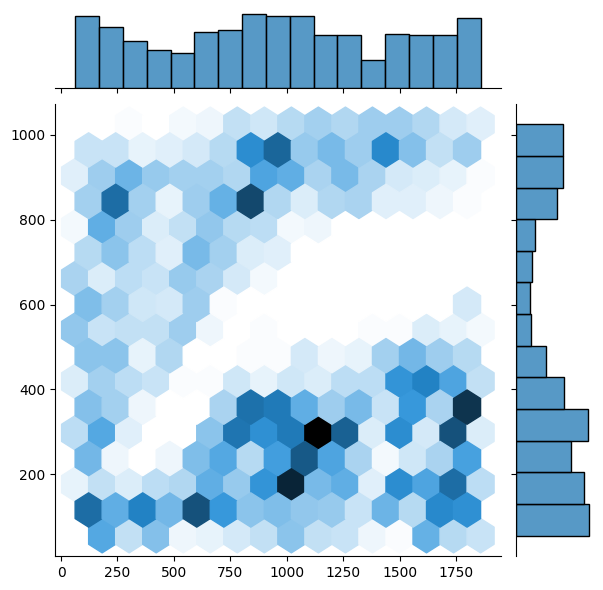

<Figure size 533.333x300 with 0 Axes>

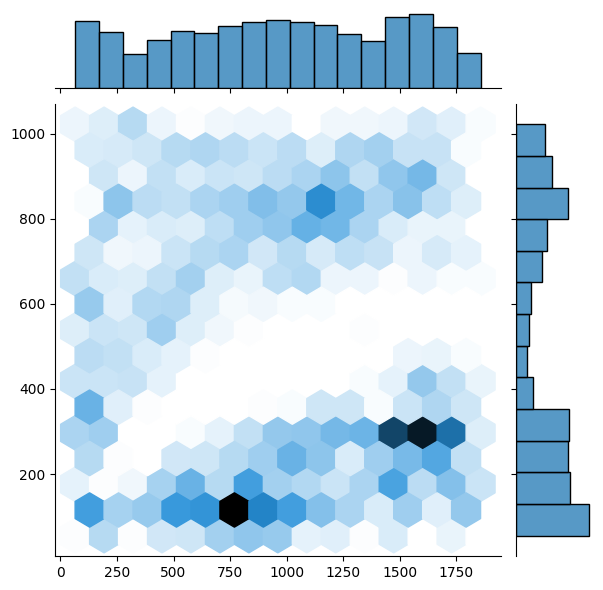

<Figure size 533.333x300 with 0 Axes>

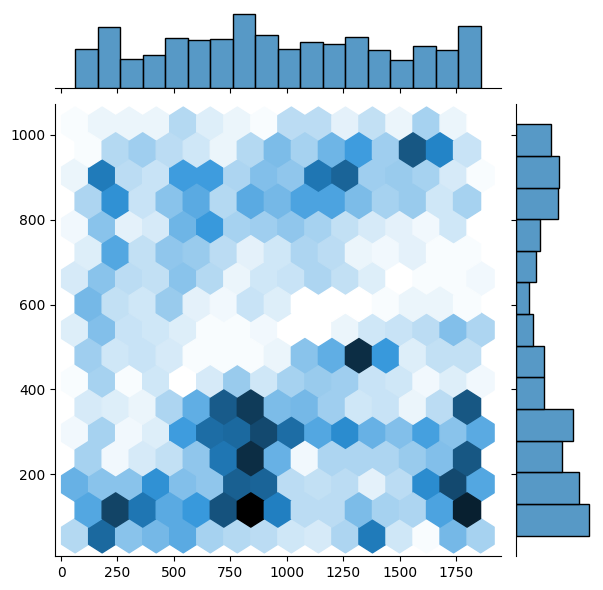

<Figure size 533.333x300 with 0 Axes>

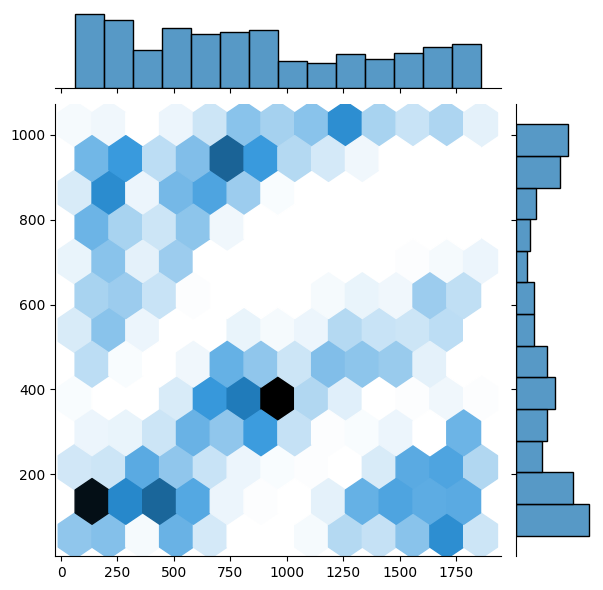

<Figure size 533.333x300 with 0 Axes>

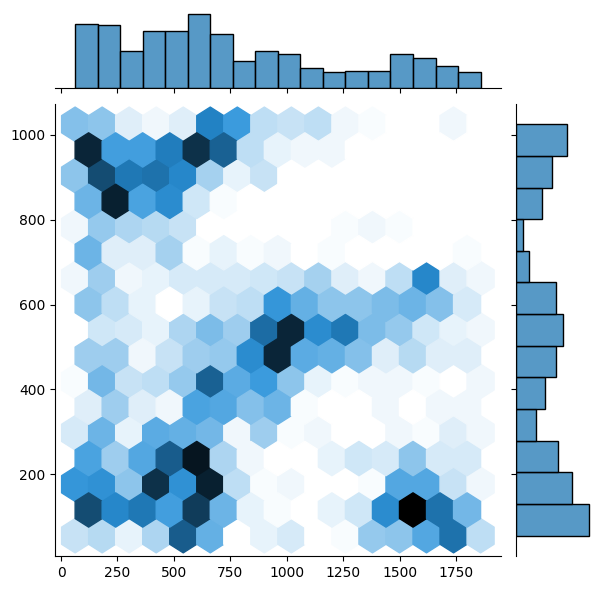

Empty DataFrame
Columns: []
Index: []

In [33]:
# group every 5 seconds
def cluster(subdf):
    scaler = StandardScaler()

    x = subdf[['center_x', 'center_y']].values
    #x = scaler.fit_transform(x)
    
    #best_k, _ = best_kmeans(x, range(2, 5))
    model = KMeans(n_clusters=50, random_state=42)
    model.fit(x)
    
    # kde = KernelDensity(kernel='gaussian', bandwidth=0.2)
    # kde.fit(x[:, 0].reshape(-1, 1))
    
    aspect_ratio = 1920/1080
    figsize = (3 * aspect_ratio, 3)
    
    # plt.figure(figsize=(10, 3))
    
    # x_plot = np.linspace(0, 1920, 1000).reshape(-1, 1)

    # kx = kde.score_samples(x_plot)
    # sns.scatterplot(
    #     x=x_plot[:,0],
    #     y=np.exp(kx),
    #     s=1,
    #     edgecolor='black',
    #     palette='rainbow',
    # )
    # plt.plot(x[:, 0], -0.005 - 0.01 * np.random.random(x.shape[0]), "+k")
    # plt.show()
    
    # plt.figure(figsize=figsize)
    # img, extent = convert_to_heatmap(x[:,0], x[:,1], 16)
    # plt.axis('off')
    # plt.legend([],[], frameon=False)
    # plt.grid(False)
    # plt.tight_layout(pad=0)
    # plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    # plt.show()
    
    plt.figure(figsize=figsize)
    sns.jointplot(
        x=x[:,0],
        y=x[:,1],
        kind='hex',
    )
    plt.show()
 
    # sns.scatterplot(
    #     x=x[:,0],
    #     y=x[:,1],
    #     hue=model.labels_,
    #     s=10,
    #     edgecolor='black',
    #     palette='rainbow',
    # )
    # sns.scatterplot(
    #     x=model.cluster_centers_[:,0],
    #     y=model.cluster_centers_[:,1],
    #     s=100,
    #     color='black',
    #     marker='x',
    #     edgecolor='black',
    # )
    #plt.show()

    return None#model.cluster_centers_

video_duration = float(video_details['format']['duration'])

groups = df\
    .groupby(pd.cut(df['progress_sec'], np.arange(0, video_duration, 1)))\
    .apply(cluster)
    
groups